Для початку імпортуємо усі необхідні модулі, для x та y обираємо значення від -5 до 5, обраховуємо y та z за формулами відповідно до завдання.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Concatenate, SimpleRNN, Reshape

x = np.linspace(-5, 5, 1000)
y = x * np.sin(x) * np.cos(x)
z = np.cos(np.sin(y)) * np.sin(x)

Оскільки будемо тестувати 6 різних нейронних мереж, то створюємо функцію з моделлю як параметром для навчання, тестування та візуалізації результату. Навчаємо модель на 20 епохах з розміром сегменту 100.

In [2]:
def modelTesting(model):
    model.compile(optimizer="adam", loss="mse")
    model.fit(x, z, epochs=20, batch_size=100)
    z_pred = model.predict(x)

    plt.plot(x, z, label="Actual")
    plt.plot(x, z_pred, label="Predicted")
    plt.legend()
    plt.show()

Створюємо мережу feedforward backprop. Відповідно маємо sequential модель з кількома щільними шарами Dense, кількість шарів задається. Вихідний шар також Dense з 1 нейроном:

In [3]:
def feedforwardCreation(layers, neurons):
    model = Sequential()
    model.add(Input(shape=(1,)))
    for i in range(layers):
        model.add(Dense(neurons, activation="relu"))
    model.add(Dense(1, name="output"))
    return model

Наступною створюємо cascadeforward backprop. Відповідно створюємо вхідний шар, за ним створюю Dense, пов’язаний з вхідним. І далі відповідно до кількості шарів створюю наступні шари, які за допомогою Concatenate пов’язані з усіма попередніми. 

In [4]:
def cascadeforwardCreation(layers, neurons):
    inputLayer = Input(shape=(1,), name="input")
    current = Dense(neurons, activation="relu")(inputLayer)
    for i in range(layers - 1):
        concatenatedLayer = Concatenate()([inputLayer, current])
        current = Dense(neurons, activation="relu")(concatenatedLayer)
    outputLayer = Dense(1, name="output")(current)
    model = Model(inputs=inputLayer, outputs=outputLayer)
    return model

Останньою мережею створюємо Elman backprop. Мережа Elman схожа на feedforward, але з додаванням контекстного шару. Контекстний шар отримує дані від прихованого шару і, у свою чергу, передає свій вихід назад у прихований шар. Ця зворотна петля надає мережі форму пам'яті.

In [5]:
def elmanCreation(layers, neurons):
    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Reshape((1, 1), name="input_reshape"))
    for i in range(layers):
        model.add(SimpleRNN(neurons, return_sequences=True, activation="relu"))
    model.add(Dense(1, name="output"))
    model.add(Reshape((1,), name="output_reshape"))
    return model

Далі створюємо власні мережі відповідно до завдання. У кожній мережі перший параметр – кількість шарів, другий – кількість нейронів у шарі.

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3980  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3663 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3450 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3302 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3190 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3088 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2995 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2905 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2825 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2739 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2660 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2583 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2509 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2435 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2362 
Epo

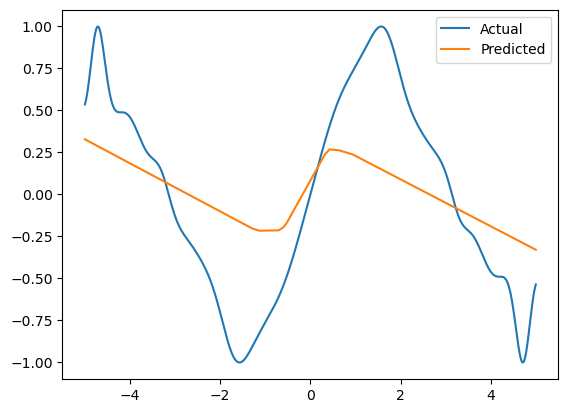

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5051  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3895 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3374 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3146 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3026 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2932 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2834 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2740 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2652 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2564 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2478 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2394 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2312 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2232 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2155 
Epo

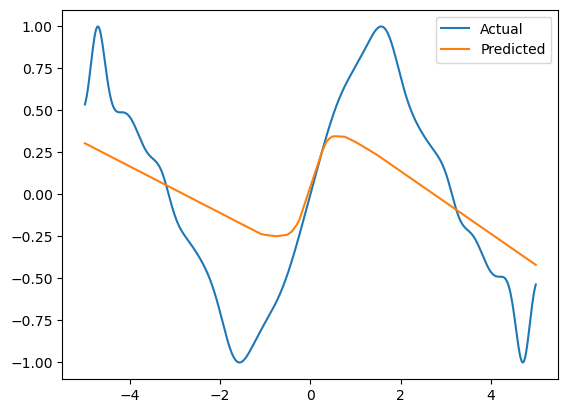

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1216  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8659 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6768 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5379 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4418 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3776 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3371 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3119 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2966 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2872 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2810 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2760 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2720 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2681 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2645 
Epo

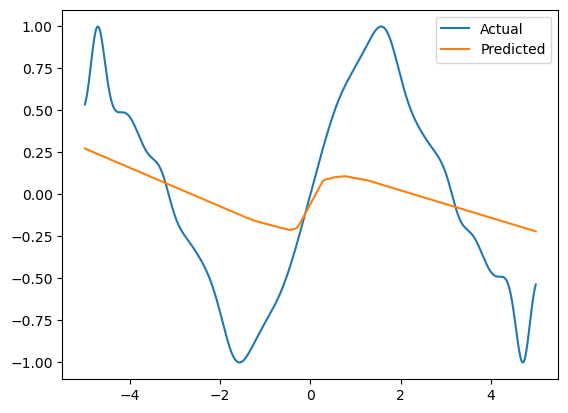

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1087  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5462 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1324 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8310 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6371 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5149 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4431 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3975 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3760 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3621 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3500 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3396 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3296 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3191 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3091 
Epo

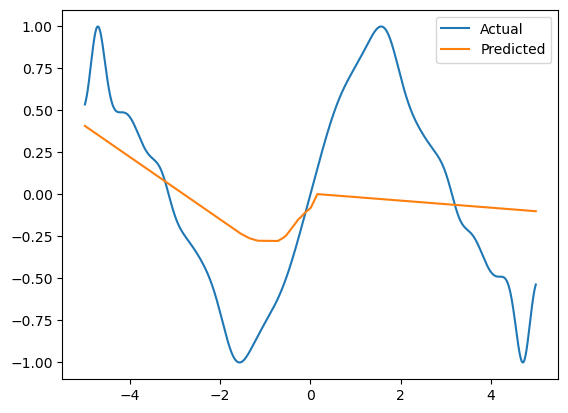

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8116  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2759 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8183 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4711 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1841 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9565 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7837 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6508 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5517 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4811 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4288 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3917 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3666 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3496 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3365 
Epo

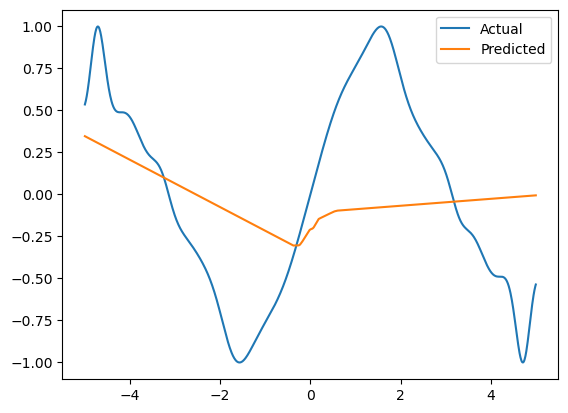

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3609
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3458 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3369 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3339 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3323 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3308 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3291 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3277 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3259 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3242 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3225 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3195 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3126 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3080 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3036 
Epoch

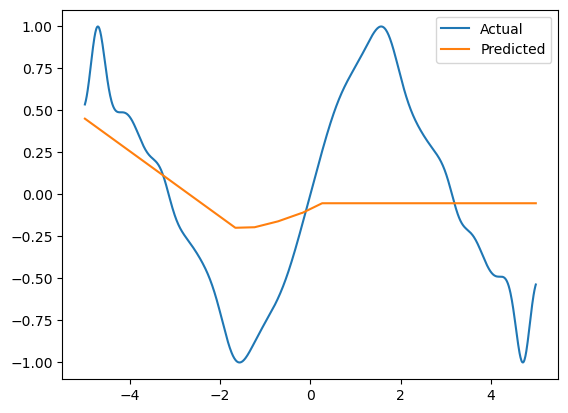

In [6]:
f1 = feedforwardCreation(1, 10)
f2 = feedforwardCreation(1, 20)

c1 = cascadeforwardCreation(1, 20)
c2 = cascadeforwardCreation(2, 10)

e1 = elmanCreation(1, 15)
e2 = elmanCreation(3, 5)

modelTesting(f1)
modelTesting(f2)

modelTesting(c1)
modelTesting(c2)

modelTesting(e1)
modelTesting(e2)